# Projet 07 : Effectuer une prédiction de revenus

---
**Importation des librairies**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import matplotlib.colors as plc
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
import modules_perso.sf_graphiques as sfg

---
## <font color=blue>Mission 4 : Modélisation du revenu des individus</font>

### 4.7. ANOVA du logarithme du revenu basée sur le logarithme du revenu moyen et l'indice de Gini du pays, et sur la classe de revenu des parents

Ce notebook a pour seule vocation le calcul d'une estimation des indices VIF pour vérifier qu'il n'y a pas de problème de colinéarité. Ce calcul est basé sur un sous-échantillon, mon ordinateur n'ayant pas été capable de l'effectuer sur l'échantillon total.

In [4]:
data = pd.read_csv("data_echantillon06.csv", index_col=0)
data.head()

C:\Anaconda3\envs\Jupyter\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,ln_child_income,ln_revenu_moyen,gini_from_centiles,parent_centile
5125654,9.703257,9.711129,33.148652,89
1834664,6.764069,6.602048,44.315701,91
1390546,8.612636,8.126737,52.463328,88
265567,9.280732,9.617445,30.157968,10
3985034,10.057259,9.782937,30.474438,21


In [6]:
anova = smf.ols(formula="ln_child_income ~ ln_revenu_moyen + gini_from_centiles + C(parent_centile)", data=data).fit()

<a id='calcul_vif'></a>

In [16]:
variables = anova.model.exog
vif_analysis = pd.DataFrame([variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])], \
                          index=[var for var in anova.model.exog_names if var!="Intercept"], columns=["VIF"])
print("ANALYSE DE LA MULTI-COLINÉARITÉ (l'indice VIF doit être inférieur à 4)")
vif_analysis

ANALYSE DE LA MULTI-COLINÉARITÉ (l'indice VIF doit être inférieur à 4)


,VIF
C(parent_centile)[T.2],1.980880
C(parent_centile)[T.3],1.981226
C(parent_centile)[T.4],1.983645
C(parent_centile)[T.5],1.983386
C(parent_centile)[T.6],1.982868
C(parent_centile)[T.7],1.984941
C(parent_centile)[T.8],1.984337
C(parent_centile)[T.9],1.984941
C(parent_centile)[T.10],1.983559
C(parent_centile)[T.11],1.984855


In [21]:
# vérification de la valeur maximale du VIF
vif_analysis.VIF.max()

1.9874471078752602

Le VIF maximum vaut 1.99. Aucun problème de colinéarité multiple.

---
Je déroule le reste de l'analyse pour vérifier que le sous-échantillonage ne corrompt pas les résultats.

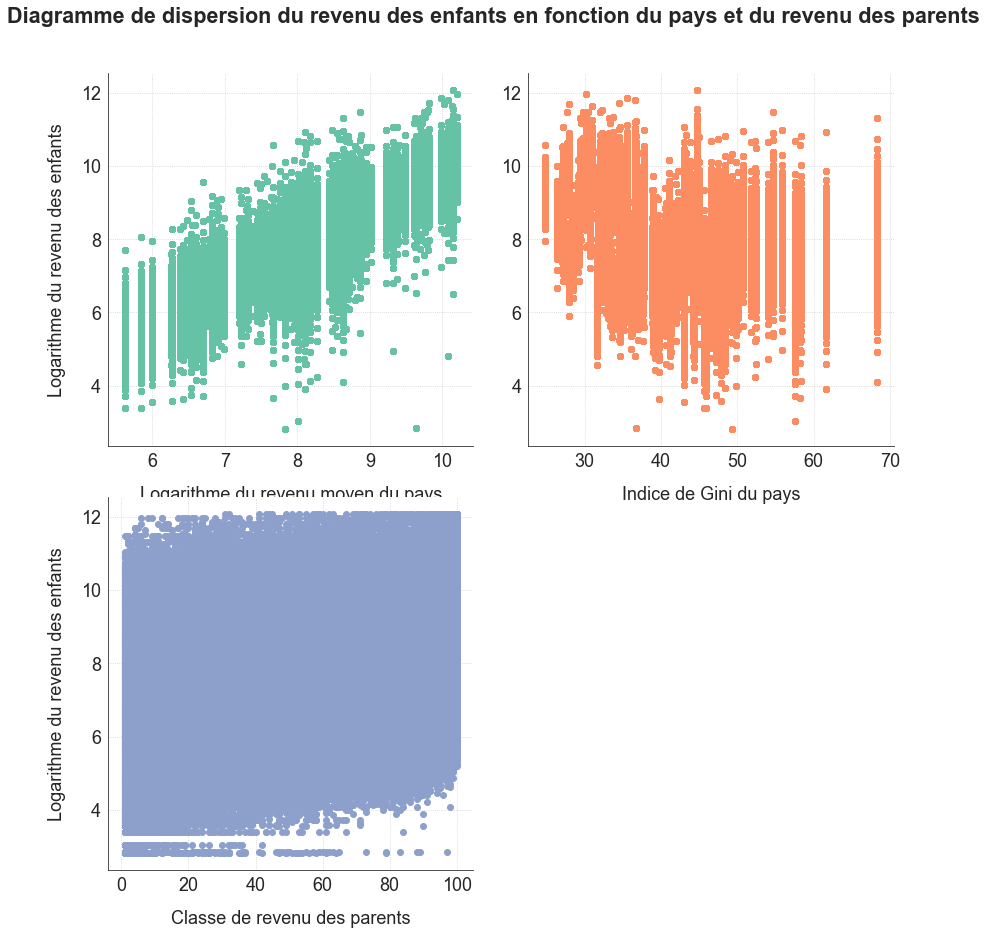

In [5]:
mygraph = sfg.MyGraph("Diagramme de dispersion du revenu des enfants en fonction du pays et du revenu des parents", nblin=2, nbcol=2, is_mono=False, figsize=(12,12))
mygraph.add_plot(data.ln_revenu_moyen, data.ln_child_income, label="", marker='o', color=mygraph.liste_couleurs[0], linestyle='', with_grid='both', grid_style=":", multi_index=1)
mygraph.add_plot(data.gini_from_centiles, data.ln_child_income, label="", marker='o', markeredgecolor=mygraph.liste_couleurs[1], markerfacecolor=mygraph.liste_couleurs[1], linestyle='', with_grid='both', grid_style=":", multi_index=2)
mygraph.add_plot(data.parent_centile, data.ln_child_income, label="", marker='o', color=mygraph.liste_couleurs[2], linestyle='', with_grid='both', grid_style=":", multi_index=3)
mygraph.set_axe('x', label="Logarithme du revenu moyen du pays", multi_index=1)
mygraph.set_axe('x', label="Indice de Gini du pays", multi_index=2)
mygraph.set_axe('x', label="Classe de revenu des parents", multi_index=3)
mygraph.set_axe('y', label="Logarithme du revenu des enfants", multi_index=1)
mygraph.set_axe('y', label="Logarithme du revenu des enfants", multi_index=3)
mygraph.ax[3].set_visible(False)
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("anova06b_00_diagramme_dispersion.png")
plt.show()

In [7]:
anova.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        ln_child_income   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                 4.121e+04
Date:                Tue, 15 Oct 2019   Prob (F-statistic):               0.00
Time:                        09:42:38   Log-Likelihood:            -1.0960e+06
No. Observations:             1128484   AIC:                         2.192e+06
Df Residuals:                 1128382   BIC:                         2.193e+06
Df Model:                         101                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -0.3988      0.008    -47.417      0.000      -0.415      -0.382
C(parent_centile)[T.2]       0.1603      0.009     18.798      0.000       0.144       0.177
C(parent_centile)[T.3]       0.2405      0.009     28.202      0.000       0.224       0.257
C(parent_centile)[T.4]       0.2952      0.009     34.634      0.000       0.278       0.312
C(parent_centile)[T.5]       0.3362      0.009     39.445      0.000       0.319       0.353
C(parent_centile)[T.6]       0.3734      0.009     43.801      0.000       0.357       0.390
C(parent_centile)[T.7]       0.4038      0.009     47.402      0.000       0.387       0.421
C(parent_centile)[T.8]       0.4226      0.009     49.599      0.000       0.406       0.439
C(parent_centile)[T.9]       0.4501      0.009     52.836      0.000       0.433       0.467
C(parent_centile)[T.10]      0.4640      0.009     54.442      0.000       0.447       0.481
C(parent_centile)[T.11]      0.4854      0.009     56.969      0.000       0.469       0.502
C(parent_centile)[T.12]      0.5046      0.009     59.216      0.000       0.488       0.521
C(parent_centile)[T.13]      0.5269      0.009     61.832      0.000       0.510       0.544
C(parent_centile)[T.14]      0.5287      0.009     62.057      0.000       0.512       0.545
C(parent_centile)[T.15]      0.5526      0.009     64.853      0.000       0.536       0.569
C(parent_centile)[T.16]      0.5548      0.009     65.128      0.000       0.538       0.572
C(parent_centile)[T.17]      0.5706      0.009     66.969      0.000       0.554       0.587
C(parent_centile)[T.18]      0.5808      0.009     68.187      0.000       0.564       0.597
C(parent_centile)[T.19]      0.6120      0.009     71.844      0.000       0.595       0.629
C(parent_centile)[T.20]      0.6126      0.009     71.931      0.000       0.596       0.629
C(parent_centile)[T.21]      0.6280      0.009     73.728      0.000       0.611       0.645
C(parent_centile)[T.22]      0.6321      0.009     74.173      0.000       0.615       0.649
C(parent_centile)[T.23]      0.6409      0.009     75.251      0.000       0.624       0.658
C(parent_centile)[T.24]      0.6597      0.009     77.442      0.000       0.643       0.676
C(parent_centile)[T.25]      0.6756      0.009     79.278      0.000       0.659       0.692
C(parent_centile)[T.26]      0.6775      0.009     79.533      0.000       0.661       0.694
C(parent_centile)[T.27]      0.6923      0.009     81.280      0.000       0.676       0.709
C(parent_centile)[T.28]      0.6912      0.009     81.157      0.000       0.675       0.708
C(parent_centile)[T.29]      0.7139      0.009     83.820      0.000       0.697       0.731
C(parent_centile)[T.30]      0.7227      0.009     84.838      0.000       0.706       0.739
C(parent_centi

In [8]:
table_anova = sm.stats.anova_lm(anova, typ=2)
table_anova.loc["total","sum_sq"] = table_anova.loc[:,"sum_sq"].sum()
table_anova.loc["total","df"] = table_anova.loc[:,"df"].sum()
table_anova["eta_squared"] = table_anova[:-2]["sum_sq"] / table_anova.loc["total","sum_sq"]
cmr = table_anova["sum_sq"][-1] / table_anova["df"][-1]
table_anova["omega_squared"] = (table_anova[:-2]["sum_sq"] - (table_anova[:-2]["df"] * cmr)) / (table_anova.loc["total","sum_sq"] + cmr)
table_anova

,sum_sq,df,F,PR(>F),eta_squared,omega_squared
C(parent_centile),1.244367e+05,99.0,3.077237e+03,0.0,0.064122,0.064034
ln_revenu_moyen,1.332488e+06,1.0,3.262201e+06,0.0,0.686624,0.686622
gini_from_centiles,2.281065e+04,1.0,5.584511e+04,0.0,0.011754,0.011753
Residual,4.609020e+05,1128382.0,NaN,NaN,NaN,NaN
total,1.940637e+06,1128483.0,NaN,NaN,NaN,NaN


### Vérification des hypothèses

**Hypothèse 1 : Normalité des résidus**

In [9]:
alpha_normalite = 0.05
ad_stat, ad_pvalue = sm.stats.normal_ad(anova.resid)
norm_stat, norm_pvalue = st.kstest(anova.resid, cdf='norm', args=(anova.resid.mean(), anova.resid.var(ddof=1)))
jb_stat, jb_pvalue, skw, kurt = sm.stats.stattools.jarque_bera(anova.resid)
df_normalite = pd.DataFrame({'H0':np.repeat("Distribution normale",3), 'Statistique':["{:.2f}".format(ad_stat),"{:.2f}".format(norm_stat),"{:.2f}".format(jb_stat)], \
                             'p-value':["{:.3f}".format(ad_pvalue),"{:.3f}".format(norm_pvalue),"{:.3f}".format(jb_pvalue)]}, index=["Anderson-Darling","Kolmogorov-Smirnov","Jarque-Bera"])
inter_col = "Résultat (seuil={:.1%})".format(alpha_normalite)
df_normalite[inter_col] = ["Normalité acceptée" if float(pval)>=alpha_normalite else "Normalité rejetée" for pval in df_normalite["p-value"]]
df_normalite

C:\Anaconda3\envs\Jupyter\lib\site-packages\statsmodels\stats\_adnorm.py:66: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  S = np.sum((2*i[sl1]-1.0)/N*(np.log(z)+np.log(1-z[sl2])), axis=axis)


,H0,Statistique,p-value,Résultat (seuil=5.0%)
Anderson-Darling,Distribution normale,2346.85,0.000,Normalité rejetée
Kolmogorov-Smirnov,Distribution normale,0.08,0.000,Normalité rejetée
Jarque-Bera,Distribution normale,330338.67,0.000,Normalité rejetée


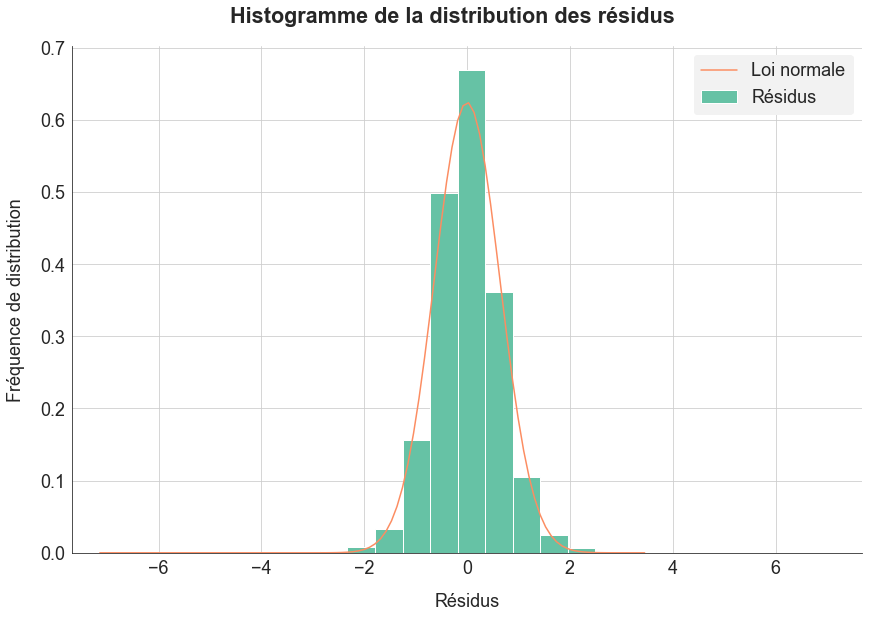

In [10]:
x_theo = np.arange(anova.resid.min(), anova.resid.max(), 0.01*(anova.resid.max()-anova.resid.min()))
mygraph = sfg.MyGraph("Histogramme de la distribution des résidus", is_mono=False)
mygraph.add_histogramme(anova.resid, bins=20, labels="Résidus")
mygraph.add_plot(x_theo, st.norm.pdf(x_theo, scale=anova.resid.std(ddof=1)), label="Loi normale", legend=True)
xmin, xmax = mygraph.ax[0].get_xlim()
absmax = max(-xmin, xmax)
mygraph.set_axe('y', label="Fréquence de distribution")
mygraph.set_axe('x', label="Résidus", tick_min=-absmax, tick_max=absmax)
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("anova06b_01_distribution_residus.png")
plt.show()

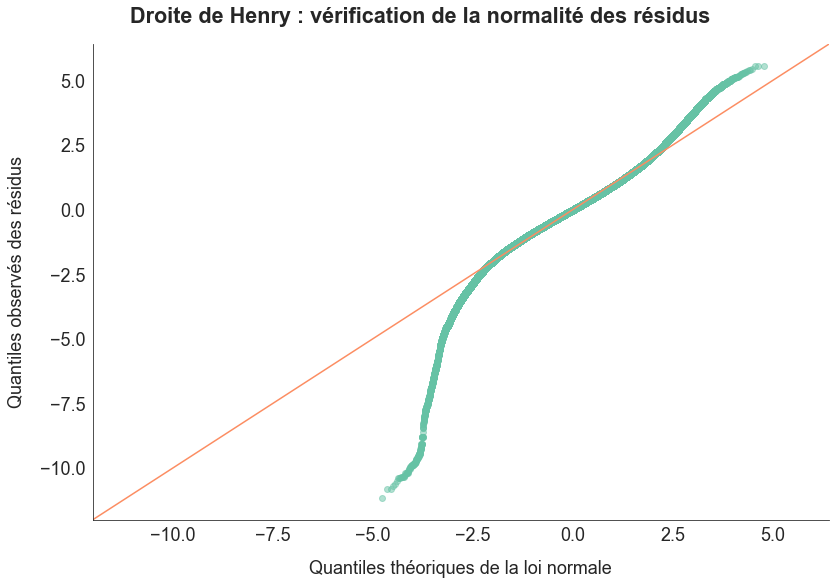

In [11]:
mygraph = sfg.MyGraph("Droite de Henry : vérification de la normalité des résidus", is_mono=False)
sm.qqplot(anova.resid, fit=True, markeredgecolor=mygraph.liste_couleurs[0], markerfacecolor=mygraph.liste_couleurs[0], alpha=0.5, ax=mygraph.ax[0])
ymin, ymax = mygraph.ax[0].get_ylim()
xmin, xmax = mygraph.ax[0].get_xlim()
data_min = min(xmin, ymin)
data_max = max(xmax, ymax)
mygraph.add_plot([data_min, data_max], [data_min, data_max], label="", color=mygraph.liste_couleurs[1])
mygraph.set_axe('x', label="Quantiles théoriques de la loi normale")
mygraph.set_axe('y', label="Quantiles observés des résidus")
mygraph.ax[0].autoscale(enable=True, axis='both', tight=True)
mygraph.fig.tight_layout()
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("anova06b_02_droite_henry.png")
plt.show()

**Hypothèse 2 : Linéarité et additivité de la relation  
Hypothèse 3 : Homoscédasticité des résidus**

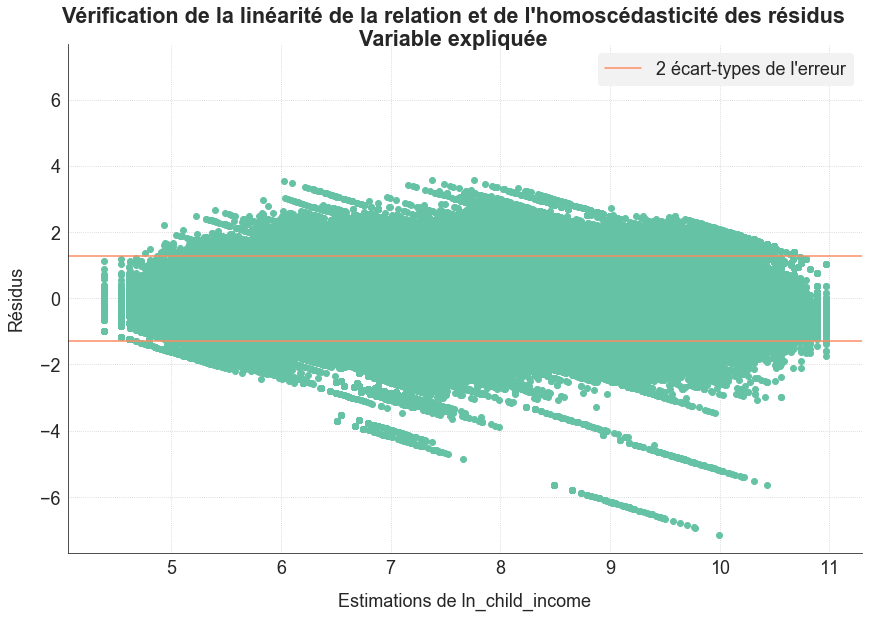

In [12]:
mygraph = sfg.MyGraph("Vérification de la linéarité de la relation et de l'homoscédasticité des résidus\nVariable expliquée", is_mono=False)
mygraph.add_plot(anova.fittedvalues, anova.resid, label="", marker='o', linestyle='', with_grid='both', grid_style=":")
yseuil = 2 * np.sqrt(table_anova.loc["Residual","sum_sq"] / table_anova.loc["Residual","df"])
mygraph.add_line(-yseuil, vertical=False, color=mygraph.liste_couleurs[1])
mygraph.add_line(yseuil, vertical=False, label="2 écart-types de l'erreur", color=mygraph.liste_couleurs[1], legend=True)
ymin, ymax = mygraph.ax[0].get_ylim()
absmax = max(-ymin, ymax, 1.1*yseuil)
mygraph.set_axe('x', label="Estimations de ln_child_income")
mygraph.set_axe('y', label="Résidus", tick_min=-absmax, tick_max=absmax)
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("anova06b_03_linearite_homoscedasticite_endo.png")
plt.show()

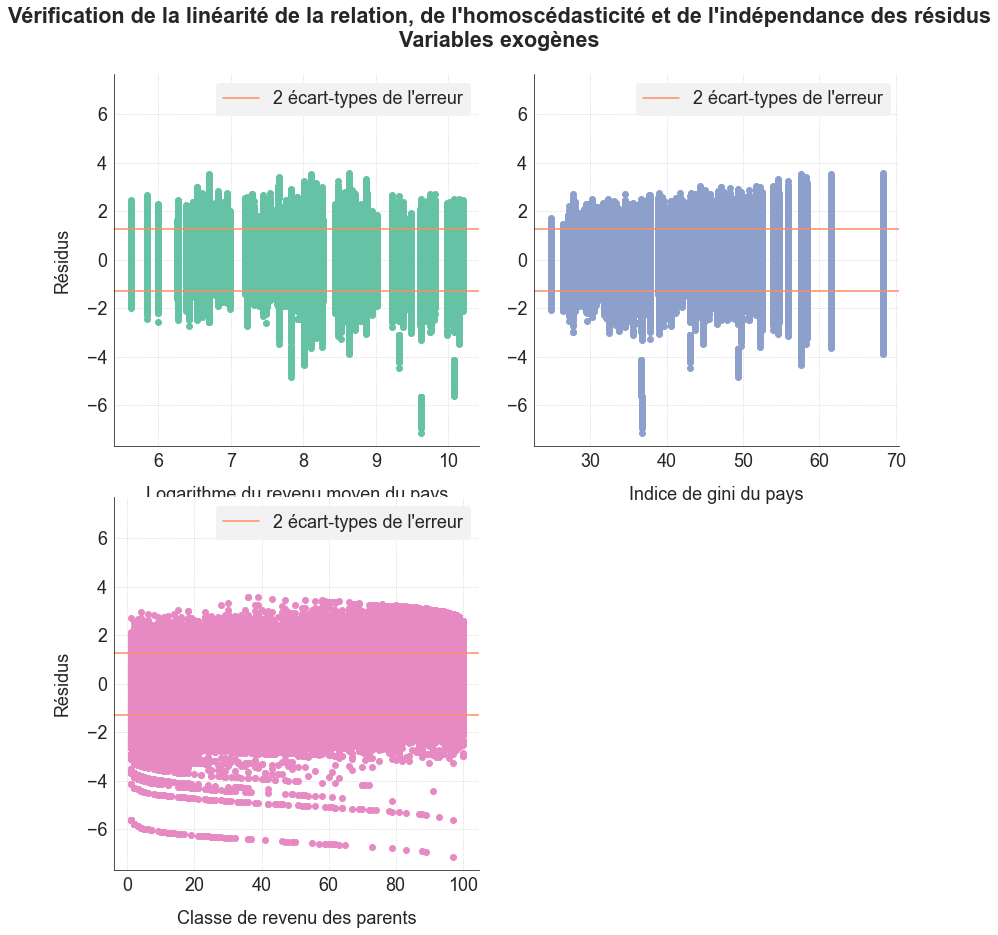

In [13]:
mygraph = sfg.MyGraph("Vérification de la linéarité de la relation, de l'homoscédasticité et de l'indépendance des résidus\nVariables exogènes", nblin=2, nbcol=2, is_mono=False, figsize=(12,12))
mygraph.add_plot(data.ln_revenu_moyen, anova.resid, label="", marker='o', color=mygraph.liste_couleurs[0], linestyle='', with_grid='both', grid_style=":", multi_index=1)
mygraph.add_plot(data.gini_from_centiles, anova.resid, label="", marker='o', color=mygraph.liste_couleurs[2], linestyle='', with_grid='both', grid_style=":", multi_index=2)
mygraph.add_plot(data.parent_centile, anova.resid, label="", marker='o', color=mygraph.liste_couleurs[3], linestyle='', with_grid='both', grid_style=":", multi_index=3)
#yseuil = 2 * np.sqrt(table_anova.loc["Residual","sum_sq"] / table_anova.loc["Residual","df"])
mygraph.add_line(-yseuil, vertical=False, color=mygraph.liste_couleurs[1], multi_index=1)
mygraph.add_line(yseuil, vertical=False, label="2 écart-types de l'erreur", color=mygraph.liste_couleurs[1], legend=True, multi_index=1)
mygraph.add_line(-yseuil, vertical=False, color=mygraph.liste_couleurs[1], multi_index=2)
mygraph.add_line(yseuil, vertical=False, label="2 écart-types de l'erreur", color=mygraph.liste_couleurs[1], legend=True, multi_index=2)
mygraph.add_line(-yseuil, vertical=False, color=mygraph.liste_couleurs[1], multi_index=3)
mygraph.add_line(yseuil, vertical=False, label="2 écart-types de l'erreur", color=mygraph.liste_couleurs[1], legend=True, multi_index=3)
ymin, ymax = mygraph.ax[0].get_ylim()
absmax = max(-ymin, ymax, 1.1*yseuil)
mygraph.set_axe('x', label="Logarithme du revenu moyen du pays", multi_index=1)
mygraph.set_axe('x', label="Indice de gini du pays", multi_index=2)
mygraph.set_axe('x', label="Classe de revenu des parents", multi_index=3)
mygraph.set_axe('y', label="Résidus", tick_min=-absmax, tick_max=absmax, multi_index=1)
mygraph.set_axe('y', tick_min=-absmax, tick_max=absmax, multi_index=2)
mygraph.set_axe('y', label="Résidus", tick_min=-absmax, tick_max=absmax, multi_index=3)
mygraph.ax[3].set_visible(False)
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("anova06b_04_linearite_homoscedasticite_exo.png")
plt.show()

In [14]:
alpha_homo = 0.05
lm_stat, lm_pvalue, f_stat, f_pvalue = sm.stats.diagnostic.het_breuschpagan(anova.resid, anova.model.exog)
if f_pvalue >= alpha_homo:
    test_result = ["Homoscédasticité acceptée"]
else:
    test_result = ["Homoscédasticité rejetée"]
pd.DataFrame({'H0':["Variance des résidus constante"], 'Statistique':["{:.2f}".format(f_stat)], \
             'p-value':["{:.3f}".format(f_pvalue)], 'Résultat (seuil={:.1%})'.format(alpha_homo):test_result}, index=["Breusch Pagan"])

,H0,Statistique,p-value,Résultat (seuil=5.0%)
Breusch Pagan,Variance des résidus constante,531.94,0.000,Homoscédasticité rejetée


**Conclusion sur les hypothèses**

Les graphiques permettent d'accepter les 3 hypothèses et de pousser plus avant l'analyse du modèle.

**Vérification supplémentaire : absence de colinéarité entre les exogènes**

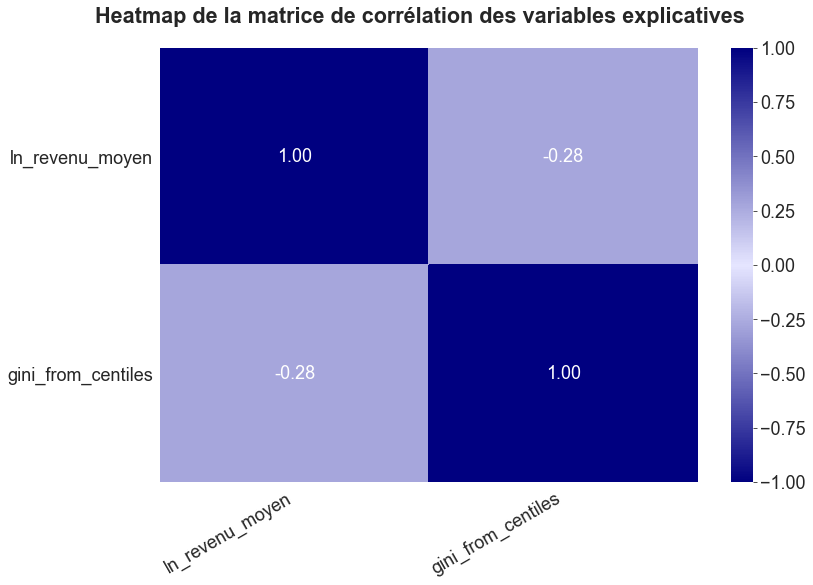

In [15]:
matrice_correl = np.corrcoef(data[["ln_revenu_moyen","gini_from_centiles"]], rowvar=False)
mygraph = sfg.MyGraph("Heatmap de la matrice de corrélation des variables explicatives", is_mono=True)
sns.heatmap(matrice_correl, vmin=-1, vmax=1, fmt='.2f', cmap=plc.LinearSegmentedColormap.from_list("", [mygraph.liste_couleurs[-1],mygraph.liste_couleurs[0],mygraph.liste_couleurs[-1]]), \
            cbar_kws={'ticks':[-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1]}, annot=True, ax=mygraph.ax[0])
mygraph.set_axe('y', tick_labels=["ln_revenu_moyen","gini_from_centiles"], rotation=0)
mygraph.set_axe('x', tick_labels=["ln_revenu_moyen","gini_from_centiles"], rotation=30, ha='right')
mygraph.fig.tight_layout()
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("anova06b_05_matrice_correl.png")
plt.show()

**Vérification de la pertinence des estimations par rapport aux valeurs réelles**

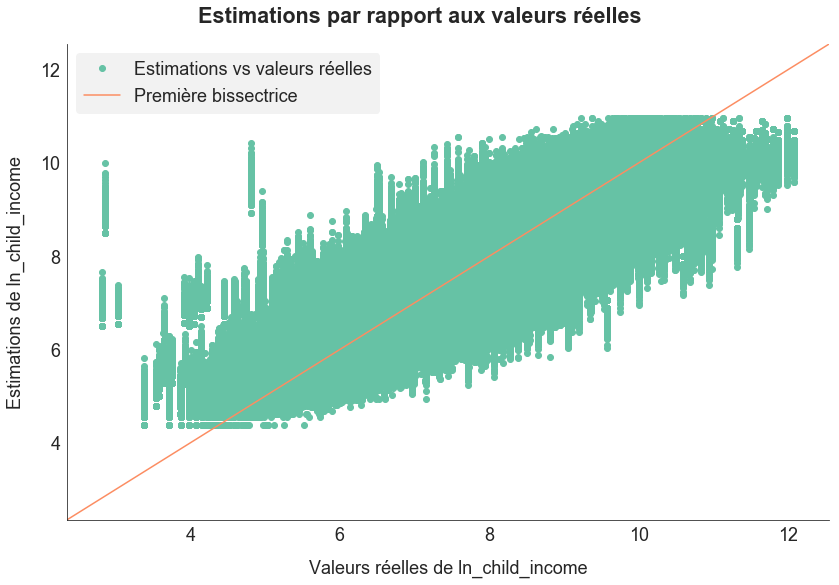

In [17]:
mygraph = sfg.MyGraph("Estimations par rapport aux valeurs réelles", is_mono=False)
mygraph.add_plot(data.ln_child_income, anova.fittedvalues, label="Estimations vs valeurs réelles", marker='o', linestyle="")
ymin, ymax = mygraph.ax[0].get_ylim()
xmin, xmax = mygraph.ax[0].get_xlim()
data_min = min(xmin, ymin)
data_max = max(xmax, ymax)
mygraph.add_plot([data_min, data_max], [data_min, data_max], label="Première bissectrice", legend=True)
mygraph.set_axe('y', label="Estimations de ln_child_income")
mygraph.set_axe('x', label="Valeurs réelles de ln_child_income")
mygraph.ax[0].autoscale(enable=True, axis='both', tight=True)
mygraph.fig.tight_layout()
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("anova06b_06_accuracy_graph.png")
plt.show()

Les estimations semblent légèrement moins dispersées par rapport à la première bissectrice avec ce modèle.

**Analyse des outliers**

In [18]:
n, p = anova.model.exog.shape
p = p - 1  # j'enlève la constante du nombre de paramètres pour ajuster les seuils
seuils = pd.Series(index=["levier", "resid_student", "dffits", "cook","dfbetas"])
seuils.levier = 2 * (p + 1) / n
seuils.dffits = 2 * np.sqrt((p + 1) / n)
seuils.cook = 4 / (n - p - 1)
seuils.resid_student = st.t.ppf(1-(0.05/2), n-p-2)  # seuil de 5% pour les résidus studentisés
reg_influence = anova.get_influence()
analyses = pd.DataFrame({"observation_name":data.index})
analyses["levier"] = reg_influence.hat_matrix_diag
#analyses["external_resid_student"] = reg_influence.resid_studentized_external
#analyses["outlier"] = ((analyses.levier > seuils.levier) | (abs(analyses.external_resid_student) > seuils.resid_student))
analyses["outlier"] = analyses.levier > seuils.levier
#analyses["dffits"] = reg_influence.dffits[0]
analyses["cook_distance"] = reg_influence.cooks_distance[0]
analyses["influence"] = analyses.cook_distance > seuils.cook
#analyses["influence"] = (abs(analyses.dffits) > seuils.dffits) | (analyses.cook_distance > seuils.cook)

In [19]:
seuils[["levier","cook"]].to_frame().style.format("{:.8f}")

,0
levier,0.00018077
cook,0.00000354


In [20]:
only_both = False
if only_both == False:
    print("Résumé des observations atypiques OU influentes")
    variables_speciales = analyses[(analyses.outlier | analyses.influence) & (analyses.outlier != analyses.influence)]
    print(variables_speciales)
    print("")
print("Résumé des observations atypiques ET influentes")
variables_investigation = analyses[analyses.outlier & analyses.influence]
variables_investigation

Résumé des observations atypiques OU influentes
         observation_name    levier  outlier  cook_distance  influence
26                4189820  0.000092    False       0.000006       True
51                3048132  0.000089    False       0.000004       True
70                1748106  0.000089    False       0.000006       True
128               1348012  0.000091    False       0.000012       True
134               4243782  0.000090    False       0.000013       True
170               5591653  0.000099    False       0.000018       True
213               4091980  0.000090    False       0.000004       True
228               2996116  0.000091    False       0.000005       True
233               3296477  0.000092    False       0.000004       True
254               5191751  0.000091    False       0.000004       True
271               3344190  0.000092    False       0.000004       True
274               5391536  0.000092    False       0.000004       True
337               5387360  0.

,observation_name,levier,outlier,cook_distance,influence


**Conclusion sur ce modèle**

L'ensemble des analyses graphiques et numériques, que ce soit sur les hypothèses, sur les outliers ou sur les résultats du modèle, donne des résultats totalement cohérents avec l'analyse sur l'échantillon complet. Cela valide la pertinence du sous-échantillon et du calcul des indices VIF sur ce sous-échantillon.